In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from basic_tools import *

debug=False

# Load variables

## Load phenotype information of individuals

In [2]:
phenotype_raw_AS=pd.read_csv(phenotype_raw_AS_path,sep='\t',index_col='ID')
phenotype_raw_AS['cohort']=1
phenotype_raw_CT=pd.read_csv(phenotype_raw_CT_path,sep='\t',index_col='ID')
phenotype_raw_CT['cohort']=2
phenotype_raw_NC=pd.read_csv(phenotype_raw_NC_path,sep='\t',index_col='ID')
phenotype_raw_NC.columns=phenotype_raw_NC.columns.str.replace('NCB','NC1')
phenotype_raw_NC['cohort']=3

phenotype_raw_AS.shape,phenotype_raw_CT.shape,phenotype_raw_NC.shape

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,11,158,552,1301) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (391,516) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (87,97,101,105,208,270,373,382,388) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((7612, 1316), (99234, 578), (19004, 431))

In [41]:
phenotype_raw=pd.concat([phenotype_raw_AS,phenotype_raw_CT,phenotype_raw_NC])
phenotype_raw=phenotype_raw.sort_values('ID')
phenotype_raw.shape

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(125850, 2323)

In [129]:
phenotype_raw.iloc[:,phenotype_raw.columns.str.contains('GLU16_U')].columns

Index(['AS1_GLU16_U', 'NC1_GLU16_U'], dtype='object')

In [70]:
#AS1_DrugIns
(phenotype_raw['AS1_DRUGINS']==2).sum()

70

In [108]:
(((phenotype_raw['cohort']==1))).sum(),\
(((phenotype_raw['AS1_PDDM']==2)|(phenotype_raw['AS1_TRTDM']==2))).sum(),\
\
(((phenotype_raw['AS1_PDDM']==2)|(phenotype_raw['AS1_TRTDM']==2))&
((phenotype_raw['AS1_PDDMAG']>0)&(phenotype_raw['AS1_PDDMAG']<20))).sum(),\
\
(((phenotype_raw['AS1_PDDM']==2)|(phenotype_raw['AS1_TRTDM']==2))&
((phenotype_raw['AS1_DRUGINS']==2))).sum(),\
\
(((phenotype_raw['AS1_PDDM']==2)|(phenotype_raw['AS1_TRTDM']==2))&
((phenotype_raw['AS1_PDDMAG']>0)&(phenotype_raw['AS1_PDDMAG']<30))&
((phenotype_raw['AS1_DRUGINS']==2))).sum(),\
\
(((phenotype_raw['AS1_PDDM']==2)|(phenotype_raw['AS1_TRTDM']==2))&
((phenotype_raw['AS1_PDDMAG']>0)&(phenotype_raw['AS1_PDDMAG']<40))&
((phenotype_raw['AS1_DRUGINS']==2))).sum()

(7612, 534, 1, 69, 3, 12)

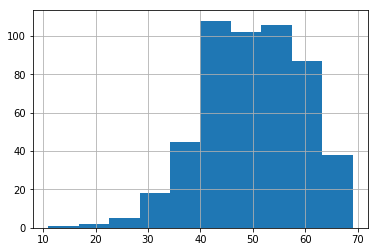

In [65]:
(phenotype_raw['AS1_PDDMAG'][(phenotype_raw['AS1_PDDM']==2)&(phenotype_raw['AS1_PDDMAG']<100)]).hist()

In [106]:
(((phenotype_raw['cohort']==2))).sum(),\
\
(((phenotype_raw['CT1_DM']==2))).sum(),\
\
(((phenotype_raw['CT1_DM']==2))&
((phenotype_raw['CT1_DMAG']>0)&(phenotype_raw['CT1_DMAG']<20))).sum(),\
\
(((phenotype_raw['CT1_DM']==2))&
((phenotype_raw['CT1_DMCUTRIN']==2)|(phenotype_raw['CT1_DMCUTY'].isin([2,4,7]))|
(phenotype_raw['CT1_DMCUTY1'].isin([2,4,5]))
)).sum(),\
\
(((phenotype_raw['CT1_DM']==2))&
((phenotype_raw['CT1_DMAG']>0)&(phenotype_raw['CT1_DMAG']<30))&
((phenotype_raw['CT1_DMCUTRIN']==2)|(phenotype_raw['CT1_DMCUTY'].isin([2,4,7]))|
(phenotype_raw['CT1_DMCUTY1'].isin([2,4,5]))
)).sum(),\
\
(((phenotype_raw['CT1_DM']==2))&
((phenotype_raw['CT1_DMAG']>0)&(phenotype_raw['CT1_DMAG']<40))&
((phenotype_raw['CT1_DMCUTRIN']==2)|(phenotype_raw['CT1_DMCUTY'].isin([2,4,7]))|
(phenotype_raw['CT1_DMCUTY1'].isin([2,4,5]))
)).sum(),\

(99234, 6575, 7, 372, 18, 119)

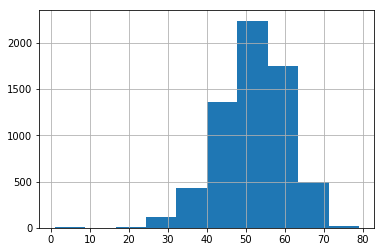

In [64]:
(phenotype_raw['CT1_DMAG'][(phenotype_raw['CT1_DM']==2)&(phenotype_raw['CT1_DMAG']<100)]).hist()

In [105]:
(((phenotype_raw['cohort']==2))).sum(),\
\
(((phenotype_raw['NC1_DM']==2))).sum(),\
\
(((phenotype_raw['NC1_DM']==2))&
((phenotype_raw['NC1_DMAG']>0)&(phenotype_raw['NC1_DMAG']<20))).sum(),\
\
(((phenotype_raw['NC1_DM']==2))&
((phenotype_raw['NC1_DMCUTRIN']==2))).sum(),\
\
(((phenotype_raw['NC1_DM']==2))&
((phenotype_raw['NC1_DMAG']>0)&(phenotype_raw['NC1_DMAG']<30))&
((phenotype_raw['NC1_DMCUTRIN']==2))).sum(),\
\
(((phenotype_raw['NC1_DM']==2))&
((phenotype_raw['NC1_DMAG']>0)&(phenotype_raw['NC1_DMAG']<40))&
((phenotype_raw['NC1_DMCUTRIN']==2))).sum()

(99234, 1803, 0, 16, 0, 3)

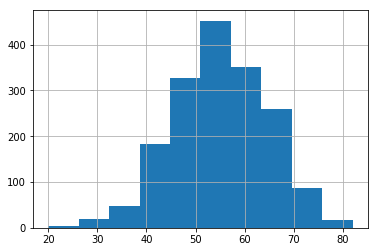

In [63]:
(phenotype_raw['NC1_DMAG'][(phenotype_raw['NC1_DM']==2)&(phenotype_raw['NC1_DMAG']<100)]).hist()

## Load codebook

In [4]:
codebook_AS=pd.read_csv(codebook_AS_path)#,header=1)
codebook_CT=pd.read_csv(codebook_CT_path)#,header=1)
codebook_NC=pd.read_csv(codebook_NC_path)

codebook_column_dict={"테이블명(영문)":"table_code","변수명": "phenotype_code","변수설명":"description", "변수값(코드) 설명": "value_description","변수유형":"type","설문지":"questionnaire"}
codebook_AS=codebook_AS.rename(columns=codebook_column_dict)
codebook_CT=codebook_CT.rename(columns=codebook_column_dict)
codebook_NC=codebook_NC.rename(columns=codebook_column_dict)

codebook_AS['type']=codebook_AS['type'].replace('범주형','categorical').replace('연속형','continuous').replace('서술형','descriptive').replace('날짜','date')
codebook_CT['type']=codebook_CT['type'].replace('범주형','categorical').replace('연속형','continuous').replace('서술형','descriptive').replace('날짜','date')
codebook_NC['type']=codebook_NC['type'].replace('범주형','categorical').replace('연속형','continuous').replace('서술형','descriptive').replace('날짜','date')

codebook_AS['phenotype_code']=codebook_AS['phenotype_code'].str.upper()

codebook_total=pd.concat([codebook_AS,codebook_CT,codebook_NC])

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


# Run conversion manual

## syntax analyzer

In [5]:
def run_command(series_in,match_value,expression):
    series_out=series_in.copy()
    series_out[series_out.index]=np.nan
    if 'x' in match_value:
        #expression='(x>10)&(x!=77777)&(x!=99999)'
        #Only float variable is supported
        def match_value_function(x):
            try:
                return False if pd.isnull(x) else eval(match_value.replace('x',str(x))) 
            except:
                print(x,end='Error')
                return False
        match_bool=series_in.map(match_value_function)
        expression_function=lambda x:eval(expression.replace('x',str(x)))
        series_out[match_bool]=series_in[match_bool].map(expression_function)
    else:
        #print(np.sum(series_in==float(match_value)))
        try:
            match_value=float(match_value)
        except:
            pass
        try:
            expression=float(expression)
        except:
            pass
        #print(series_in.unique(),(series_in=='폐암').sum(),'폐암',match_value,match_value.strip("'")=='폐암',type('폐암'),type(match_value),match_value,expression)
        if type(match_value)==str and '+' in match_value:
            print("!! contain mode !!")
            series_out[series_in.map(lambda x: False if pd.isnull(x) or type(x)!=str else (match_value.replace('+','') in x))]=expression
        else:
            series_out[series_in==match_value]=expression
    return series_out

#conversion_manual.to_csv(conversion_manual_path,sep='\t',index=None)

## Run specific conversion (for debugging)

### Check if need

In [6]:
"""
(phenotype_raw['AS1_TRTAS']==2).sum(),(phenotype_raw['AS1_PDAS']==2).sum()
phenotype_raw.index[(phenotype_raw['CT1_ASTHCU']>=1) & (phenotype_raw['CT1_ASTHCU']<=4)].difference(phenotype_raw.index[phenotype_raw['CT1_ASTH']==2])
a=phenotype_raw.index[phenotype_raw['AS1_TRTAS']==2].difference(phenotype_raw.index[phenotype_raw['AS1_PDAS']==1])
len(a)

phenotype_raw['NC1_CA1'].unique(),phenotype_raw['NC1_CA_NA2'].unique()

phenotype_raw['AS1_HIP1'].hist()

(phenotype_raw['AS1_HIP1']-phenotype_raw['AS1_HIP2']).hist()

phenotype_raw_CT.columns[phenotype_raw_CT.columns.str.contains('BLOOD')]
(phenotype_raw['NC1_CRP'][phenotype_raw['NC1_CRP']!=99999]*0.1).median()
(phenotype_raw['AS1_PDDEM']).value_counts()
#(phenotype_raw['AS1_PREGNO']-phenotype_raw['AS1_CHILD_P']-phenotype_raw['AS1_CHILD_D']).value_counts()
"""

"\n(phenotype_raw['AS1_TRTAS']==2).sum(),(phenotype_raw['AS1_PDAS']==2).sum()\nphenotype_raw.index[(phenotype_raw['CT1_ASTHCU']>=1) & (phenotype_raw['CT1_ASTHCU']<=4)].difference(phenotype_raw.index[phenotype_raw['CT1_ASTH']==2])\na=phenotype_raw.index[phenotype_raw['AS1_TRTAS']==2].difference(phenotype_raw.index[phenotype_raw['AS1_PDAS']==1])\nlen(a)\n\nphenotype_raw['NC1_CA1'].unique(),phenotype_raw['NC1_CA_NA2'].unique()\n\nphenotype_raw['AS1_HIP1'].hist()\n\n(phenotype_raw['AS1_HIP1']-phenotype_raw['AS1_HIP2']).hist()\n\nphenotype_raw_CT.columns[phenotype_raw_CT.columns.str.contains('BLOOD')]\n(phenotype_raw['NC1_CRP'][phenotype_raw['NC1_CRP']!=99999]*0.1).median()\n(phenotype_raw['AS1_PDDEM']).value_counts()\n#(phenotype_raw['AS1_PREGNO']-phenotype_raw['AS1_CHILD_P']-phenotype_raw['AS1_CHILD_D']).value_counts()\n"

In [9]:
name_filter='blood_in_urine'
test_match_value=1
test_conversion_value=2

conversion_manual=pd.read_csv(conversion_manual_path,sep='\t',index_col='phenotype_code')

##Run all 'commands' with name=='new_name'
conversion_list_dict={}
for idx,row in conversion_manual[~pd.isnull(conversion_manual['commands'])].iterrows():
    for command in row['commands'].split('|'):
        new_name,match_value,expression=command.split('@')
        if name_filter!=None and new_name!=name_filter:
            continue
        print(idx,command,phenotype_raw[idx].unique())
        print("# of filtered={} before: ".format(test_match_value),(phenotype_raw[idx]==test_match_value).sum())
        conversion=run_command(phenotype_raw[idx],match_value,expression)
        conversion_list_dict[new_name]=conversion_list_dict.get(new_name,[])+[conversion]
        print("# of filtered={} after: ".format(test_conversion_value),(conversion==test_conversion_value).sum(),", conversion unique",conversion.unique())
        print('-----------------------------------------')

NC1_BLOOD16_U blood_in_urine@(x!=66666)&(x!=77777)&(x!=99999)@x [6.6666e+04        nan 1.0000e+00 0.0000e+00 3.0000e+00 2.0000e+00
 9.9999e+04 4.0000e+00]
# of filtered=1 before:  825
# of filtered=2 after:  548 , conversion unique [nan  1.  0.  3.  2.  4.]
-----------------------------------------


In [10]:
print("--------------Conversion----------------------")
# merge results of same 'new_name'
conversion_dict={}
for new_name,conversion_list in conversion_list_dict.items():
    merge_result=None
    for conversion_result in conversion_list:
        if merge_result is None:
            merge_result= conversion_result
        else:
            merge_result.update(conversion_result)
    print(new_name,str(merge_result.unique())[:30])
    conversion_dict[new_name]=merge_result
#cohort 별 분포
print('# of null:', conversion_dict[name_filter].isnull().sum())
conversion_dict[name_filter].value_counts()

--------------Conversion----------------------
blood_in_urine [nan  1.  0.  3.  2.  4.]
# of null: 115537


0.0    8189
1.0     825
2.0     548
3.0     384
4.0     367
Name: NC1_BLOOD16_U, dtype: int64

In [11]:
print('# of {} in AS:'.format(test_conversion_value),\
      (phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==1).sum(),'/',\
      (phenotype_raw['cohort']==1).sum(),\
      '{:.2f}'.format((phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==1).sum()/(phenotype_raw['cohort']==1).sum()*100),\
     )
print('# of {} in CT:'.format(test_conversion_value),\
      (phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==2).sum(),'/',\
      (phenotype_raw['cohort']==2).sum(),\
      '{:.2f}'.format((phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==2).sum()/(phenotype_raw['cohort']==2).sum()*100),\
     )

print('# of {} in NC:'.format(test_conversion_value),\
      (phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==3).sum(),'/',\
      (phenotype_raw['cohort']==3).sum(),\
      '{:.2f}'.format((phenotype_raw[conversion_dict[name_filter]==test_conversion_value]['cohort']==3).sum()/(phenotype_raw['cohort']==3).sum()*100),\
     )

      #'---','{:.2f}'.format(phenotype_raw['AS1_contain'][conversion_dict[name_filter]==test_conversion_value].sum()/phenotype_raw['AS1_contain'].sum()*100))

# of 2 in AS: 0 / 7612 0.00
# of 2 in CT: 0 / 99234 0.00
# of 2 in NC: 548 / 19004 2.88


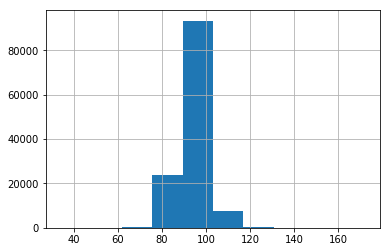

In [78]:
conversion_dict[name_filter].hist()
plt.show()

## Run all conversion (for debugging)

In [7]:
conversion_manual=pd.read_csv(conversion_manual_path,sep='\t',index_col='phenotype_code')

In [ ]:
name_filter=None
test_match_value=1
test_conversion_value=2

##Run all 'commands' with name=='new_name'
conversion_list_dict={}
for idx,row in conversion_manual[~pd.isnull(conversion_manual['commands'])].iterrows():
    for command in row['commands'].split('|'):
        new_name,match_value,expression=command.split('@')
        if name_filter!=None and new_name!=name_filter:
            continue
        print(idx,command,phenotype_raw[idx].unique())
        print("# of filtered={} before: ".format(test_match_value),(phenotype_raw[idx]==test_match_value).sum())
        conversion=run_command(phenotype_raw[idx],match_value,expression)
        conversion_list_dict[new_name]=conversion_list_dict.get(new_name,[])+[conversion]
        print("# of filtered={} after: ".format(test_conversion_value),(conversion==test_conversion_value).sum(),", conversion unique",conversion.unique())
        print('-----------------------------------------')

In [10]:
print("--------------Conversion----------------------")
# merge results of same 'new_name'
conversion_dict={}
for new_name,conversion_list in conversion_list_dict.items():
    merge_result=None
    for conversion_result in conversion_list:
        if merge_result is None:
            merge_result= conversion_result
        else:
            merge_result.update(conversion_result)
    print(new_name,str(merge_result.unique())[:30])
    conversion_dict[new_name]=merge_result
#cohort 별 분포

--------------Conversion----------------------
age [67. 60. 51. 70. 68. 77. 65. 5
sex [2. 1.]
asthma [nan  2.]
chronic_bronchitis [nan  2.]
allergic_disease [nan  2.]
stomach_cancer [nan 2.0]
liver_cancer [nan 2.0]
colorectal_cancer [nan 2.0]
breast_cancer [nan 2.0]
cervical_cancer [nan 2.0]
lung_cancer [nan 2.0]
thyroid_cancer [nan 2.0]
prostate_cancer [nan 2.0]
bladder_cancer [nan 2.0]
colon_polyps [nan  2.]
angina_pectoris_myocardial_infarction [nan  2.]
hypertension [nan  2.]
stroke [nan  2.]
transient_ischemic_attacks [nan  2.]
acute_liver_disease [nan  2.]
diabetes [ 2. nan]
hyperlipidemia [nan  2.]
thyroid_disease [nan  2.]
arthritis [nan  2.]
osteoporosis [nan  2.]
parkinson [nan  2.]
pwi_total [nan 27.  7. 10. 11. 12. 37.  
chronic_gastritis_stomach_ulcer [nan  2.]
duodenal_ulcer [nan  2.]
urinary_tract_infection [nan  2.]
height [136.7 159.4 162.5 143.3 154. 
hip_circumference [ 92.    94.4   85.6   94.5   
waist_circumference [ 93.    92.7   79.9   82.4   
weight [ 57.1   60

## converting to Pandas DataFrame

In [11]:
conversion_df=pd.DataFrame(conversion_dict)
conversion_df['cohort']=phenotype_raw['cohort']
conversion_df['bmi']=(conversion_df['weight']/((0.01*conversion_df['height'])**2)).round(2)

# Clean up

## human-readable transformation manual

In [12]:
conversion_manual_nonull=conversion_manual[~pd.isnull(conversion_manual['commands'])]
conversion_manual_nonull['new_name']=conversion_manual_nonull['commands'].map(lambda x: x.split('|')[0].split('@')[0])

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
conversion_manual_codebook=pd.DataFrame(columns=pd.MultiIndex.from_product([[i for i in range(0,15)], list(codebook_column_dict.values())+['commands']], names=['code', 'data']),index=conversion_manual_nonull.new_name.unique())

In [14]:
for new_name in conversion_manual_nonull.new_name.unique():
    conversion_manual_nonull_select=conversion_manual_nonull[conversion_manual_nonull['new_name']==new_name]
    for idx,(phenotype_code,row) in enumerate(conversion_manual_nonull_select.iterrows()):
        codebook_total_select=codebook_total[codebook_total['phenotype_code']==phenotype_code][codebook_column_dict.values()].iloc[0]
        codebook_total_select['commands']=row['commands']
        conversion_manual_codebook.loc[row['new_name']][idx]=codebook_total_select

In [15]:
conversion_manual_codebook.to_csv(conversion_manual_codebook_path,encoding='utf8')

## Selecting individuals to be included in control group

In [16]:
conversion_df['arthritis'].unique(),conversion_df['diabetes'].unique(),conversion_df['thyroid_disease'].unique(),conversion_df['cervical_cancer'].unique()

(array([nan,  2.]),
 array([ 2., nan]),
 array([nan,  2.]),
 array([nan, 2.0], dtype=object))

In [17]:
print(len(conversion_df.index))
control_select=conversion_df.index[~(conversion_df['arthritis']==2)]
control_idx=conversion_df.index.intersection(control_select)
print(len(control_select),len(control_idx))
control_select=conversion_df.index[~(conversion_df['diabetes']==2)]
control_idx=control_idx.intersection(control_select)
print(len(control_select),len(control_idx))
control_select=conversion_df.index[~(conversion_df['thyroid_disease']==2)]
control_idx=control_idx.intersection(control_select)
print(len(control_select),len(control_idx))
control_select=conversion_df.index[~(conversion_df['cervical_cancer']==2)]
control_idx=control_idx.intersection(control_select)
print(len(control_select),len(control_idx))

125850
114492 114492
116938 106618
120706 102564
125429 102246


In [18]:
control_filter=(conversion_df['age']<0)
control_filter[control_idx]=True
control_filter.sum()

102246

## Saving Phenotype

In [19]:
conversion_df=pd.DataFrame(conversion_dict)
conversion_df['cohort']=phenotype_raw['cohort']
conversion_df['bmi']=(conversion_df['weight']/((0.01*conversion_df['height'])**2)).round(2)

In [20]:
cohort_to_name=lambda x: 'AS' if x==1 else 'CT' if x==2 else 'NC' if x==3 else 'error'

In [24]:
try_float_to_int=lambda x: x if np.isnan(x) else x if x%1!=0 else np.int(x)

In [42]:
pheno_sumstatsjpg_file_path=data_out_pheno_path+'{}.jpg'

quantitative traits -- age


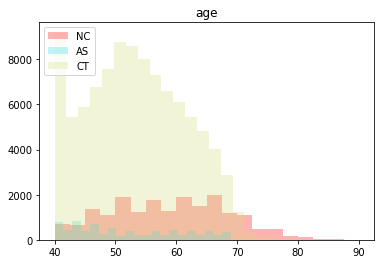

--------------------------------
quantitative traits -- sex


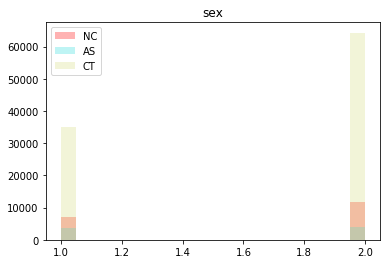

--------------------------------
binary traits -- asthma
    case  control  missing
NC   273    15526     3205
AS   173     5794     1645
CT  1672    79480    18082


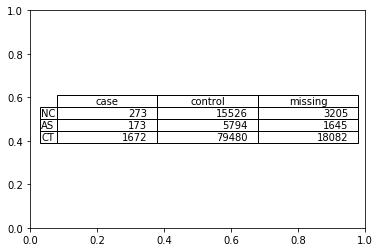

--------------------------------
binary traits -- chronic_bronchitis
     case  control  missing
NC  155.0  15607.0   3242.0
AS    NaN      NaN   7612.0
CT  750.0  80147.0  18337.0


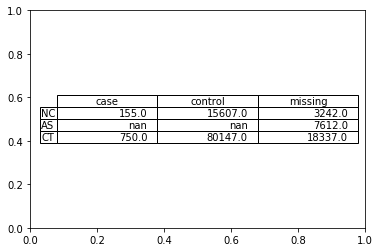

--------------------------------
binary traits -- allergic_disease
    case  control  missing
NC   703    15223     3078
AS  1450     4804     1358
CT  7129    75267    16838


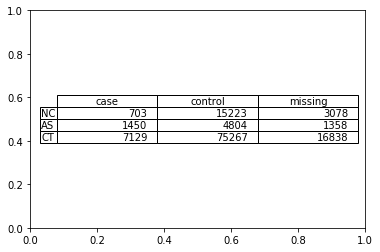

--------------------------------
binary traits -- stomach_cancer
    case  control  missing
NC   135    15600     3269
AS     1     5906     1705
CT   460    80254    18520


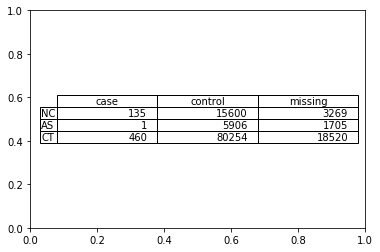

--------------------------------
binary traits -- liver_cancer
    case  control  missing
NC   9.0  15708.0   3287.0
AS   NaN      NaN   7612.0
CT  64.0  80577.0  18593.0


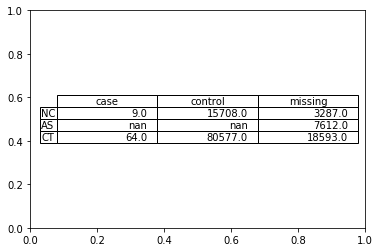

--------------------------------
binary traits -- colorectal_cancer
    case  control  missing
NC    28    15689     3287
AS     1     5905     1706
CT   240    80451    18543


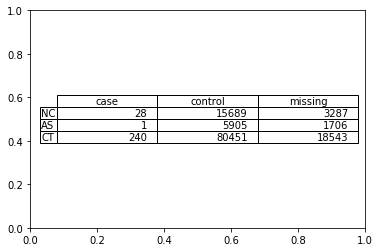

--------------------------------
binary traits -- breast_cancer
    case  control  missing
NC    55    15669     3280
AS    26     5889     1697
CT   552    80211    18471


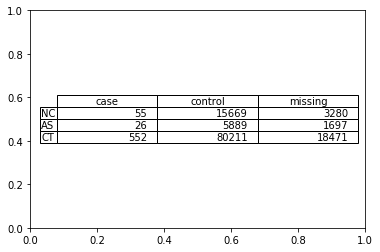

--------------------------------
binary traits -- cervical_cancer
    case  control  missing
NC    28    15714     3262
AS     2     5906     1704
CT   391    80626    18217


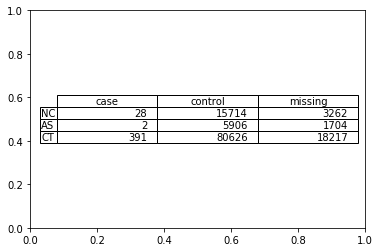

--------------------------------
binary traits -- lung_cancer
    case  control  missing
NC    19    15700     3285
AS     1     5905     1706
CT    71    80575    18588


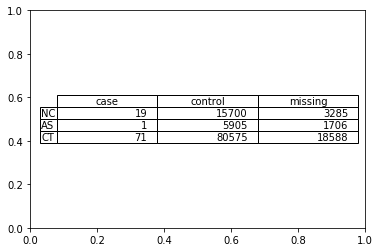

--------------------------------
binary traits -- thyroid_cancer
    case  control  missing
NC    34    15689     3281
AS     1     5906     1705
CT   648    80189    18397


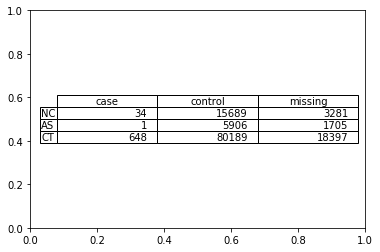

--------------------------------
binary traits -- prostate_cancer
    case  control  missing
NC   5.0  15709.0   3290.0
AS   NaN      NaN   7612.0
CT  53.0  80581.0  18600.0


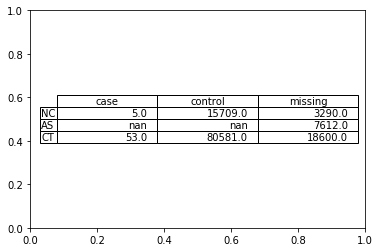

--------------------------------
binary traits -- bladder_cancer
    case  control  missing
NC   5.0  15709.0   3290.0
AS   NaN      NaN   7612.0
CT  42.0  80599.0  18593.0


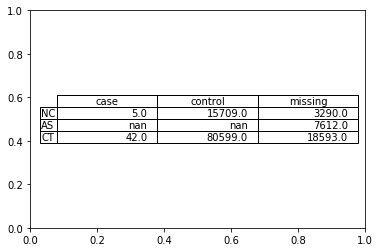

--------------------------------
binary traits -- colon_polyps
      case  control  missing
NC    78.0  15662.0   3264.0
AS     NaN      NaN   7612.0
CT  4129.0  77532.0  17573.0


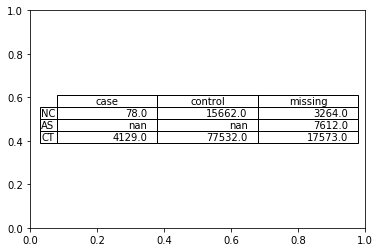

--------------------------------
binary traits -- angina_pectoris_myocardial_infarction
    case  control  missing
NC   477    15368     3159
AS   114     5833     1665
CT  2489    78992    17753


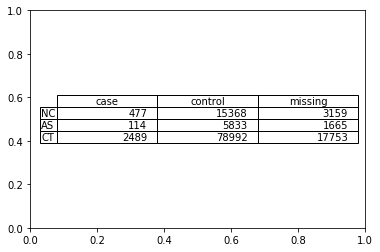

--------------------------------
binary traits -- hypertension
     case  control  missing
NC   5072    11937     1995
AS   1230     5125     1257
CT  19348    67318    12568


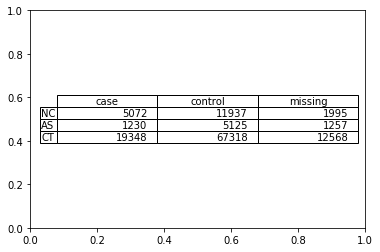

--------------------------------
binary traits -- stroke
    case  control  missing
NC   544    15301     3159
AS    92     5841     1679
CT  1173    79863    18198


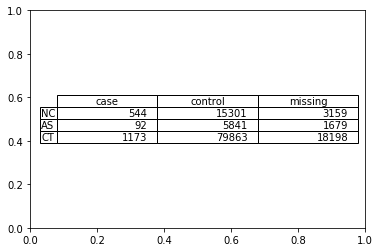

--------------------------------
binary traits -- transient_ischemic_attacks
    case  control  missing
NC  16.0  15704.0   3284.0
AS   NaN      NaN   7612.0
CT  43.0  80605.0  18586.0


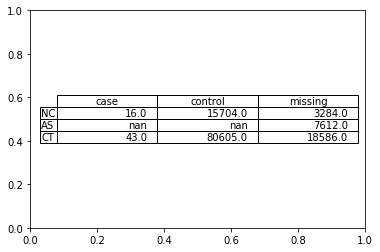

--------------------------------
binary traits -- acute_liver_disease
     case  control  missing
NC   62.0  15677.0   3265.0
AS    NaN      NaN   7612.0
CT  607.0  80183.0  18444.0


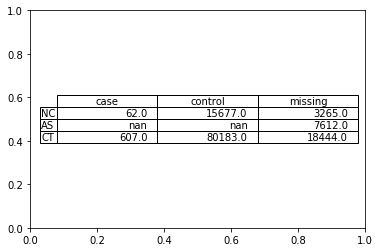

--------------------------------
binary traits -- diabetes
    case  control  missing
NC  1803    15714     1487
AS   534     5906     1172
CT  6575    80626    12033


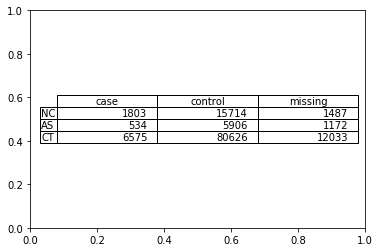

--------------------------------
binary traits -- hyperlipidemia
    case  control  missing
NC  1308    14801     2895
AS   198     5757     1657
CT  9541    74331    15362


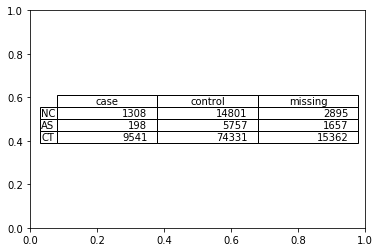

--------------------------------
binary traits -- thyroid_disease
    case  control  missing
NC   321    15714     2969
AS   234     5906     1472
CT  4589    80626    14019


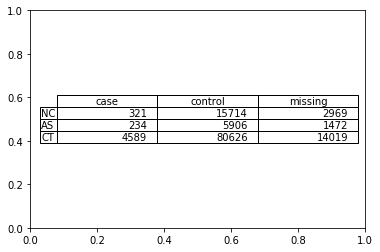

--------------------------------
binary traits -- arthritis
    case  control  missing
NC  1396    15714     1894
AS  1102     5906      604
CT  8860    80626     9748


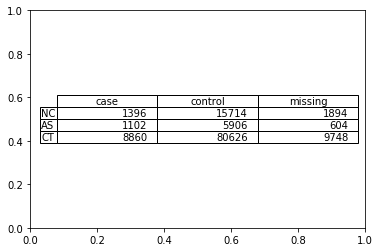

--------------------------------
binary traits -- osteoporosis
    case  control  missing
NC   828    15272     2904
AS   136     5846     1630
CT  5062    77762    16410


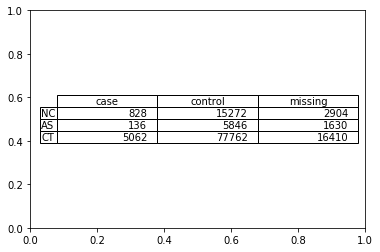

--------------------------------
binary traits -- parkinson
    case  control  missing
NC   6.0  15708.0   3290.0
AS   NaN      NaN   7612.0
CT  26.0  80605.0  18603.0


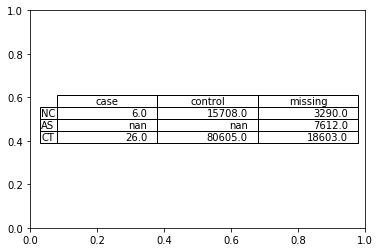

--------------------------------
quantitative traits -- pwi_total


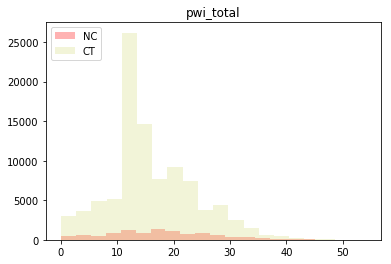

--------------------------------
binary traits -- chronic_gastritis_stomach_ulcer
     case  control  missing
NC   1289    14833     2882
AS   1659     4640     1313
CT  13580    70790    14864


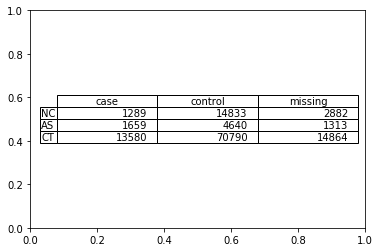

--------------------------------
binary traits -- duodenal_ulcer
      case  control  missing
NC    72.0  15663.0   3269.0
AS     NaN      NaN   7612.0
CT  1614.0  79412.0  18208.0


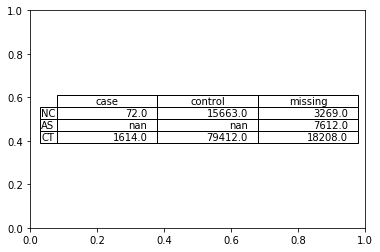

--------------------------------
binary traits -- urinary_tract_infection
    case  control  missing
NC   429    15441     3134
AS    53     5867     1692
CT  1888    79406    17940


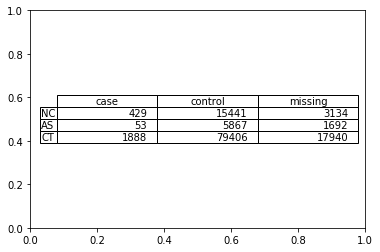

--------------------------------
quantitative traits -- height


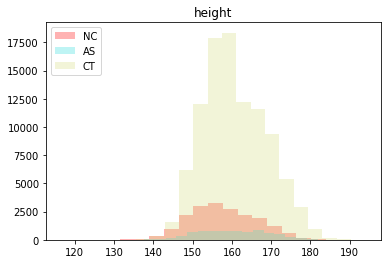

--------------------------------
quantitative traits -- hip_circumference


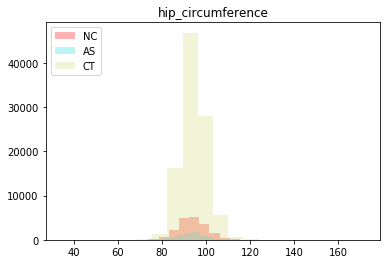

--------------------------------
quantitative traits -- waist_circumference


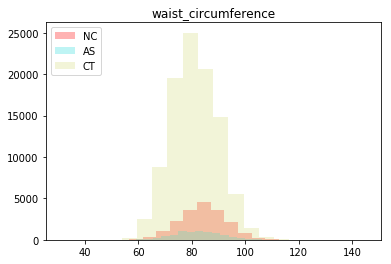

--------------------------------
quantitative traits -- weight


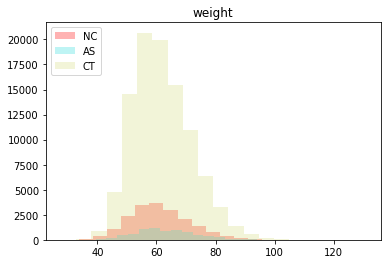

--------------------------------
quantitative traits -- systolic_blood_pressure


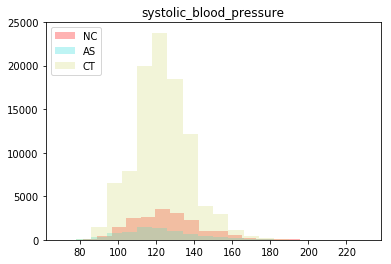

--------------------------------
quantitative traits -- diastolic_blood_pressure


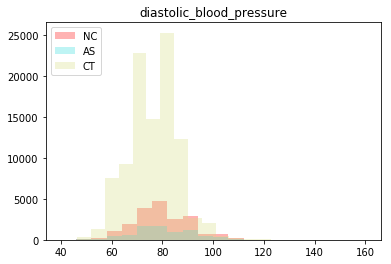

--------------------------------
quantitative traits -- pulse


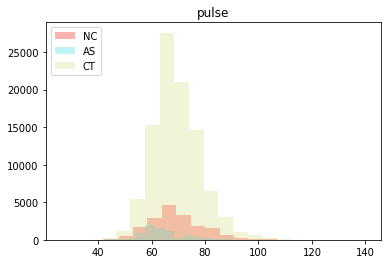

--------------------------------
binary traits -- hysterectomy
      case  control  missing
NC  1241.0  14750.0   3013.0
AS     NaN      NaN   7612.0
CT  7295.0  75503.0  16436.0


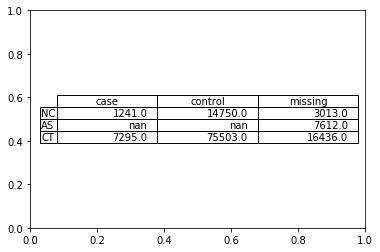

--------------------------------
quantitative traits -- menarche_onset_age


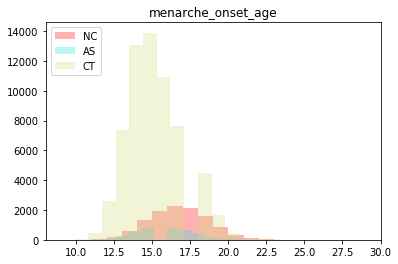

--------------------------------
quantitative traits -- menopause_age


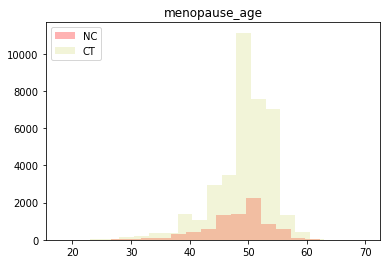

--------------------------------
quantitative traits -- menopause_cycle


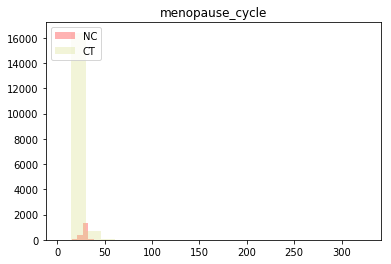

--------------------------------
binary traits -- ovarian_extraction
      case  control  missing
NC    98.0  15626.0   3280.0
AS     NaN      NaN   7612.0
CT  4232.0  77575.0  17427.0


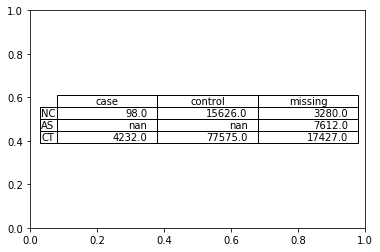

--------------------------------
quantitative traits -- child_delivery_number


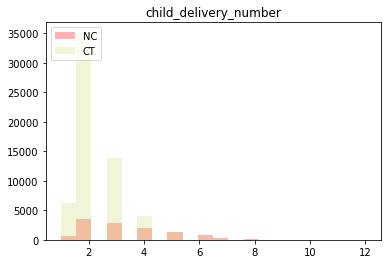

--------------------------------
binary traits -- big_baby
      case  control  missing
NC   743.0  15085.0   3176.0
AS     NaN      NaN   7612.0
CT  4325.0  77398.0  17511.0


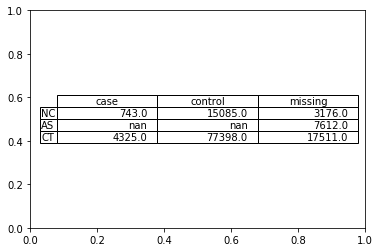

--------------------------------
binary traits -- small_baby
      case  control  missing
NC   178.0  15568.0   3258.0
AS     NaN      NaN   7612.0
CT  2602.0  78565.0  18067.0


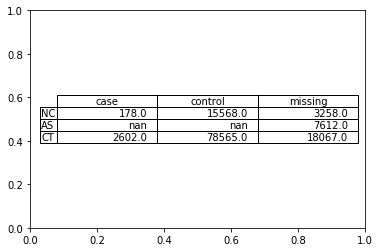

--------------------------------
quantitative traits -- child_present


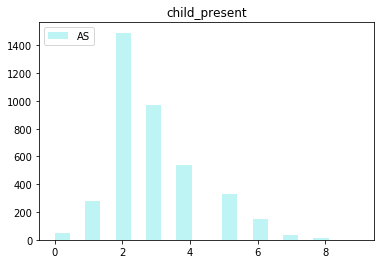

--------------------------------
quantitative traits -- child_dead


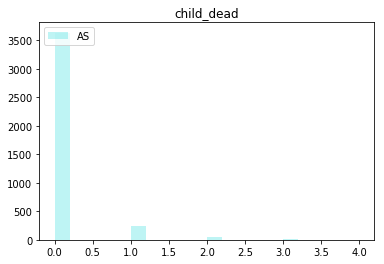

--------------------------------
quantitative traits -- hematocrit


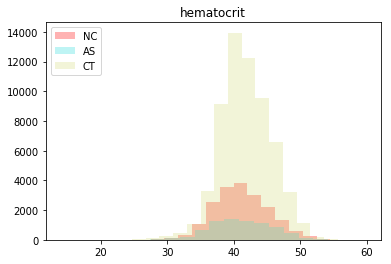

--------------------------------
quantitative traits -- hemoglobin


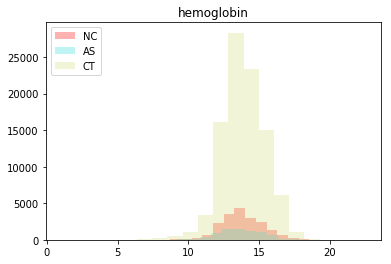

--------------------------------
quantitative traits -- platelet


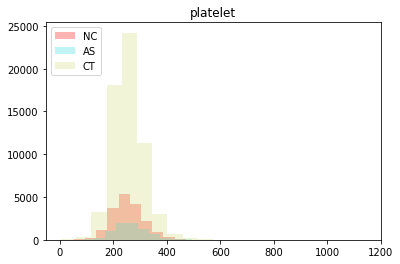

--------------------------------
quantitative traits -- rbc


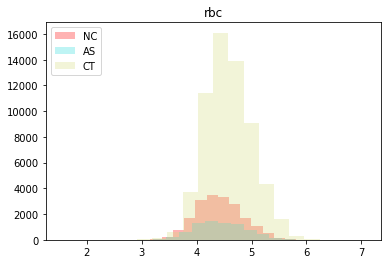

--------------------------------
quantitative traits -- wbc


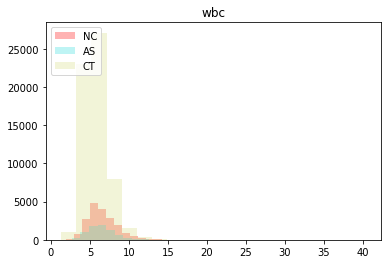

--------------------------------
quantitative traits -- mcv


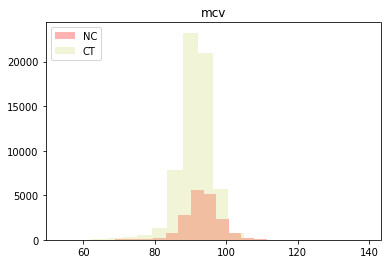

--------------------------------
quantitative traits -- mch


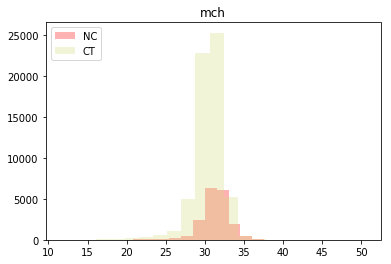

--------------------------------
quantitative traits -- mchc


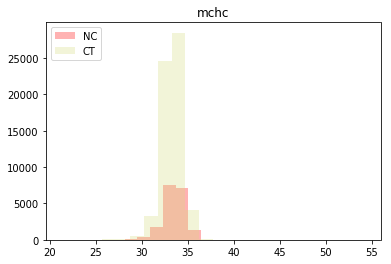

--------------------------------
quantitative traits -- total_bilirubin


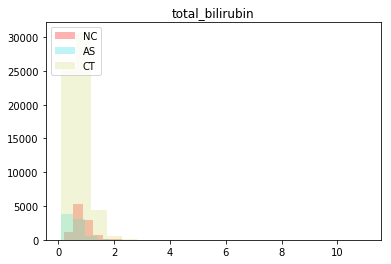

--------------------------------
quantitative traits -- bun


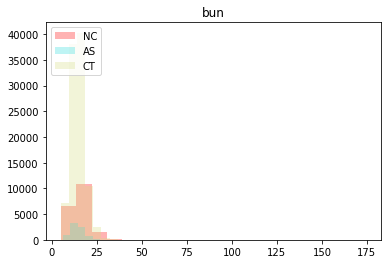

--------------------------------
quantitative traits -- creatinine


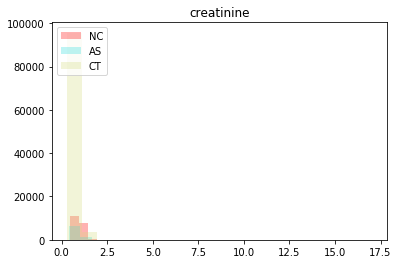

--------------------------------
quantitative traits -- blood_in_urine


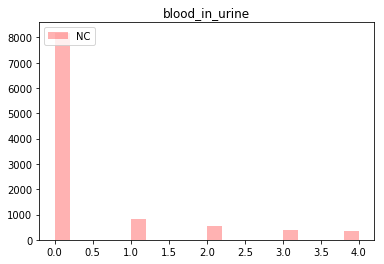

--------------------------------
quantitative traits -- glucose_in_urine


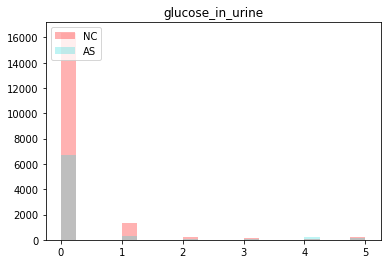

--------------------------------
quantitative traits -- alt


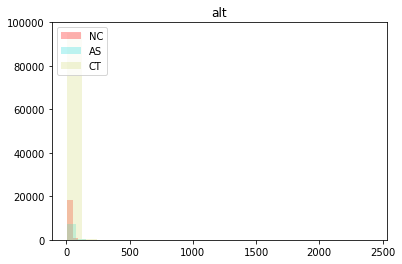

--------------------------------
quantitative traits -- ast


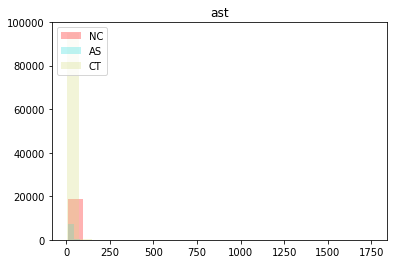

--------------------------------
quantitative traits -- gtp


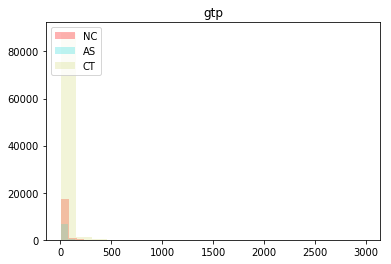

--------------------------------
quantitative traits -- total_cholesterol


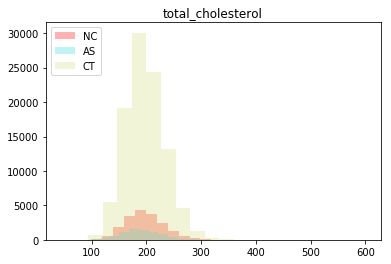

--------------------------------
quantitative traits -- hdl_cholesterol


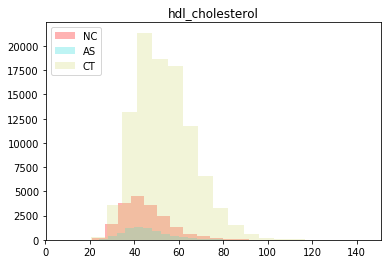

--------------------------------
quantitative traits -- hba1c


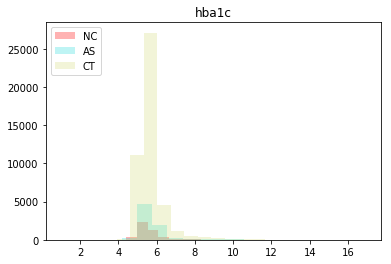

--------------------------------
quantitative traits -- freet4


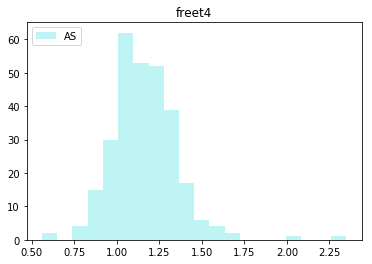

--------------------------------
quantitative traits -- tsh


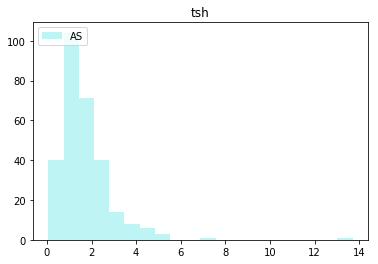

--------------------------------
quantitative traits -- triglyceride


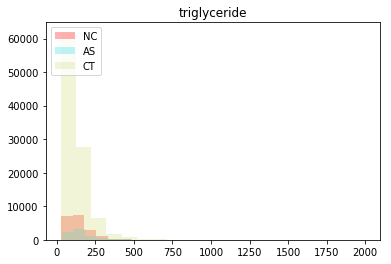

--------------------------------
quantitative traits -- albumin


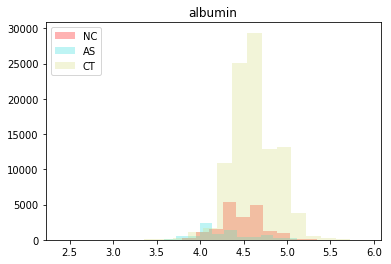

--------------------------------
quantitative traits -- hscrp


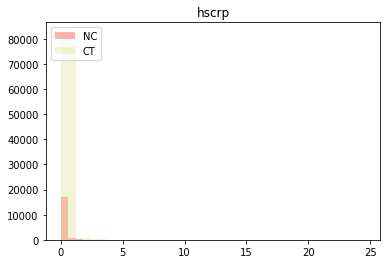

--------------------------------
quantitative traits -- protein_in_urine


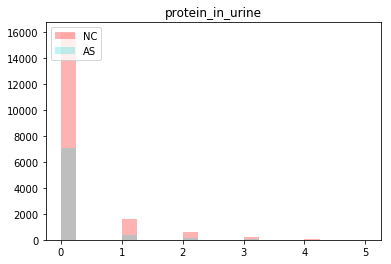

--------------------------------
binary traits -- heart_failure
    case  control  missing
NC  75.0  15670.0   3259.0
AS  16.0   5900.0   1696.0
CT   NaN      NaN  99234.0


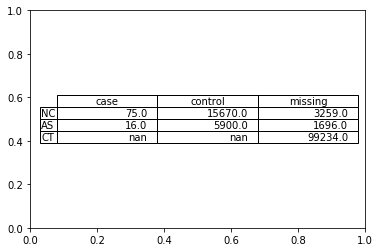

--------------------------------
binary traits -- peripheral_vascular_diseases
    case  control  missing
NC   NaN      NaN  19004.0
AS  24.0   5893.0   1695.0
CT   NaN      NaN  99234.0


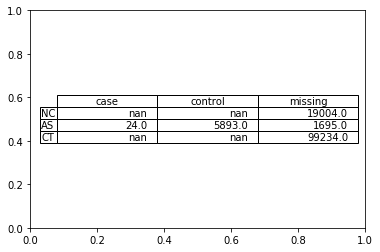

--------------------------------
binary traits -- cataract
      case  control  missing
NC   378.0  15498.0   3128.0
AS     NaN      NaN   7612.0
CT  3344.0  78698.0  17192.0


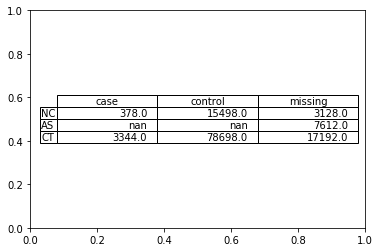

--------------------------------
binary traits -- glaucoma
     case  control  missing
NC   56.0  15676.0   3272.0
AS    NaN      NaN   7612.0
CT  574.0  80250.0  18410.0


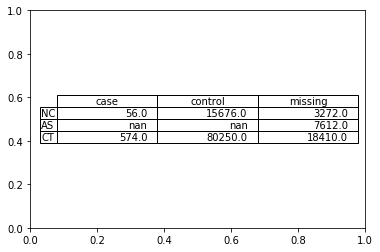

--------------------------------
binary traits -- renal_failure
     case  control  missing
NC    NaN      NaN  19004.0
AS    NaN      NaN   7612.0
CT  110.0  80561.0  18563.0


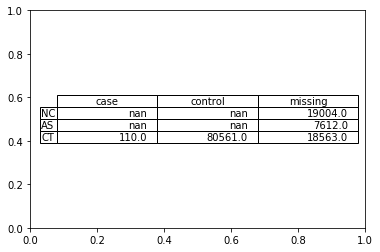

--------------------------------
quantitative traits -- renin


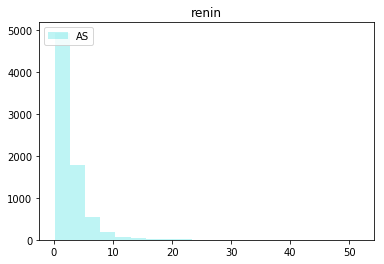

--------------------------------
binary traits -- fatty_liver
      case  control  missing
NC   726.0  15251.0   3027.0
AS     NaN      NaN   7612.0
CT  5483.0  76913.0  16838.0


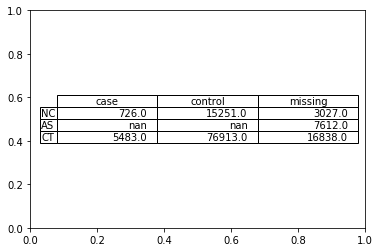

--------------------------------
binary traits -- copd
     case  control  missing
NC    NaN      NaN  19004.0
AS   53.0   5875.0   1684.0
CT  140.0  80532.0  18562.0


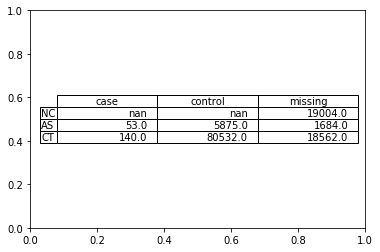

--------------------------------
binary traits -- tuberculosis
     case  control  missing
NC  404.0  15398.0   3202.0
AS    NaN      NaN   7612.0
CT    NaN      NaN  99234.0


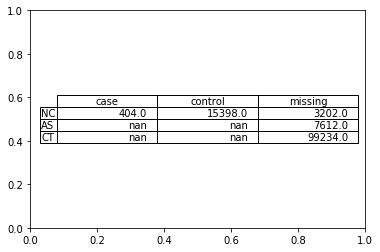

--------------------------------
binary traits -- benign_prostatic_hyperplasia
     case  control  missing
NC  168.0  15588.0   3248.0
AS    NaN      NaN   7612.0
CT    NaN      NaN  99234.0


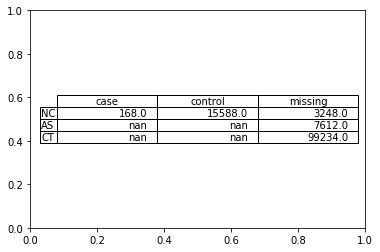

--------------------------------
binary traits -- gout
     case  control  missing
NC    NaN      NaN  19004.0
AS  454.0   5851.0   1307.0
CT  601.0  80181.0  18452.0


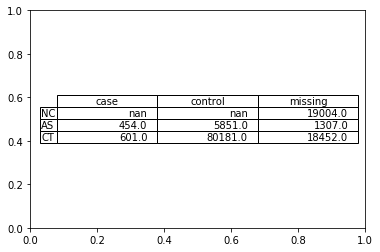

--------------------------------
binary traits -- fracture
       case  control  missing
NC    635.0  15180.0   3189.0
AS      NaN      NaN   7612.0
CT  10239.0  72683.0  16312.0


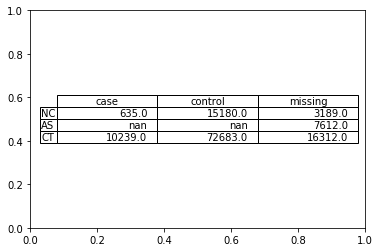

--------------------------------
binary traits -- cholelithiasis_cholecystitis
      case  control  missing
NC   283.0  15515.0   3206.0
AS     NaN      NaN   7612.0
CT  2705.0  78738.0  17791.0


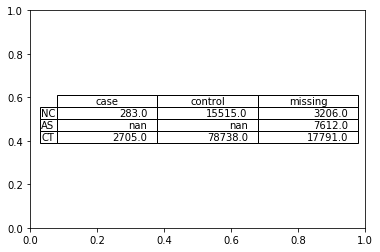

--------------------------------
binary traits -- periodontal_disease
      case  control  missing
NC     NaN      NaN  19004.0
AS     NaN      NaN   7612.0
CT  6100.0  76372.0  16762.0


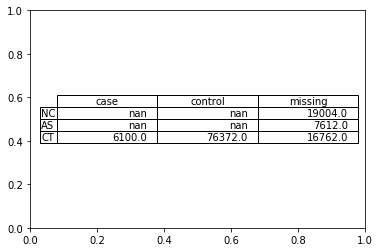

--------------------------------
binary traits -- insomnia
      case  control  missing
NC     NaN      NaN  19004.0
AS  1219.0   5101.0   1292.0
CT     NaN      NaN  99234.0


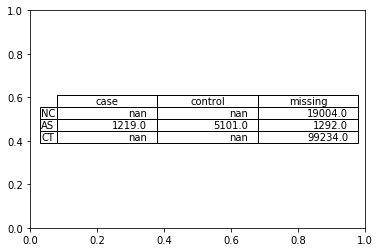

--------------------------------
quantitative traits -- sleep_duration


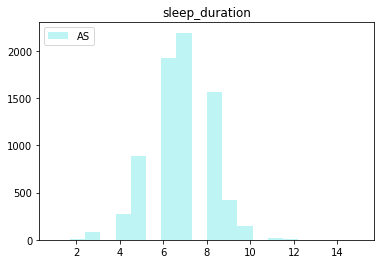

--------------------------------
binary traits -- neurosis
     case  control  missing
NC  112.0  15652.0   3240.0
AS    NaN      NaN   7612.0
CT    NaN      NaN  99234.0


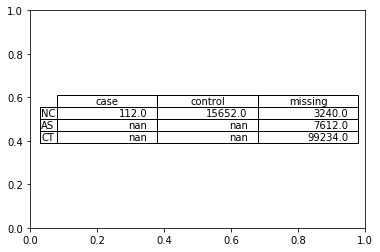

--------------------------------
binary traits -- chest_x_ray_00
      case  control  missing
NC     NaN      NaN  19004.0
AS  2328.0   4108.0   1176.0
CT     NaN      NaN  99234.0


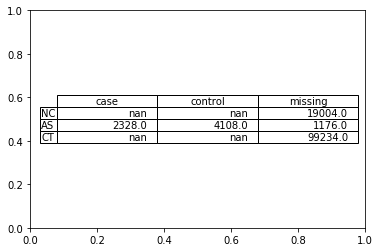

--------------------------------
binary traits -- chest_x_ray_01
     case  control  missing
NC    NaN      NaN  19004.0
AS  198.0   5749.0   1665.0
CT    NaN      NaN  99234.0


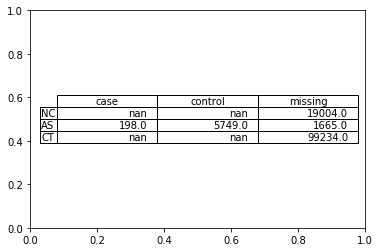

--------------------------------
binary traits -- chest_x_ray_02
     case  control  missing
NC    NaN      NaN  19004.0
AS  332.0   5635.0   1645.0
CT    NaN      NaN  99234.0


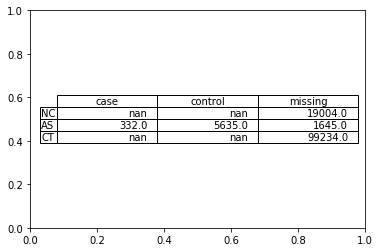

--------------------------------
binary traits -- chest_x_ray_03
     case  control  missing
NC    NaN      NaN  19004.0
AS  255.0   5748.0   1609.0
CT    NaN      NaN  99234.0


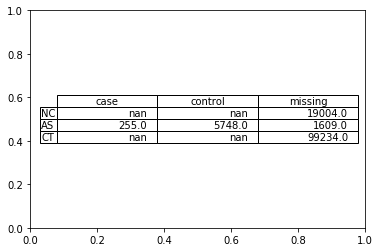

--------------------------------
binary traits -- chest_x_ray_04
     case  control  missing
NC    NaN      NaN  19004.0
AS  636.0   5372.0   1604.0
CT    NaN      NaN  99234.0


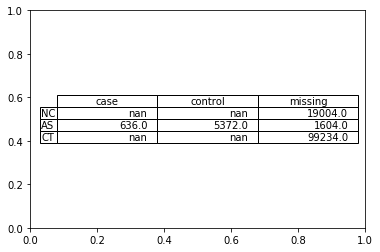

--------------------------------
binary traits -- chest_x_ray_05
     case  control  missing
NC    NaN      NaN  19004.0
AS  741.0   5328.0   1543.0
CT    NaN      NaN  99234.0


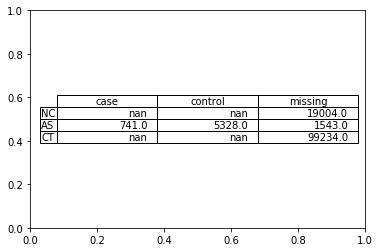

--------------------------------
binary traits -- chest_x_ray_06
    case  control  missing
NC   NaN      NaN  19004.0
AS  25.0   5891.0   1696.0
CT   NaN      NaN  99234.0


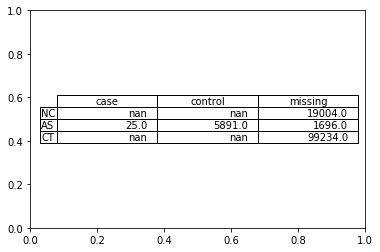

--------------------------------
binary traits -- chest_x_ray_07
    case  control  missing
NC   NaN      NaN  19004.0
AS  25.0   5888.0   1699.0
CT   NaN      NaN  99234.0


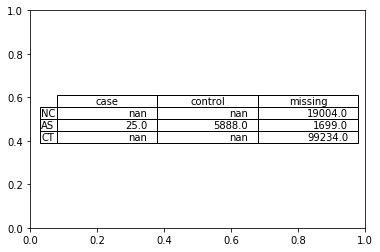

--------------------------------
binary traits -- chest_x_ray_08
     case  control  missing
NC    NaN      NaN  19004.0
AS  140.0   5808.0   1664.0
CT    NaN      NaN  99234.0


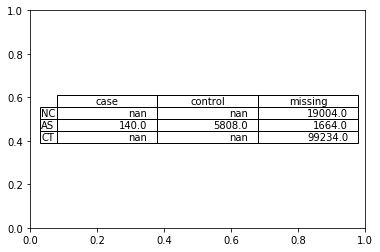

--------------------------------
binary traits -- chest_x_ray_09
    case  control  missing
NC   NaN      NaN  19004.0
AS  30.0   5887.0   1695.0
CT   NaN      NaN  99234.0


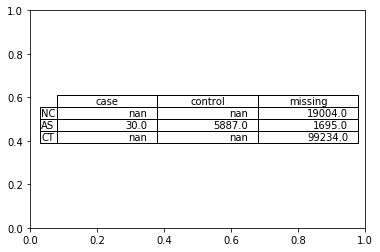

--------------------------------
binary traits -- chest_x_ray_10
    case  control  missing
NC   NaN      NaN  19004.0
AS  44.0   5876.0   1692.0
CT   NaN      NaN  99234.0


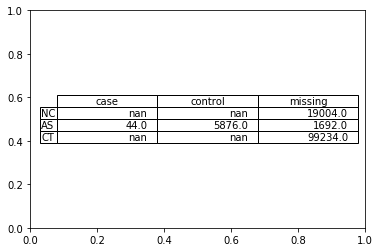

--------------------------------
binary traits -- chest_x_ray_11
    case  control  missing
NC   NaN      NaN  19004.0
AS  23.0   5890.0   1699.0
CT   NaN      NaN  99234.0


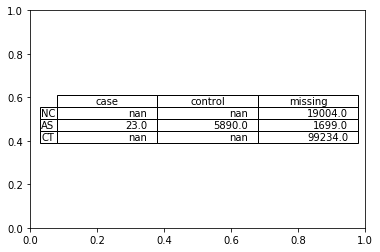

--------------------------------
binary traits -- chest_x_ray_12
     case  control  missing
NC    NaN      NaN  19004.0
AS  277.0   5698.0   1637.0
CT    NaN      NaN  99234.0


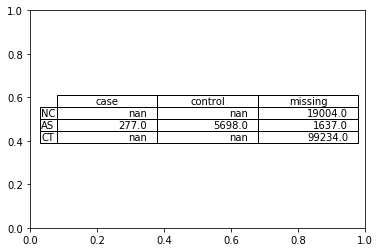

--------------------------------
binary traits -- chest_x_ray_13
    case  control  missing
NC   NaN      NaN  19004.0
AS   6.0   5902.0   1704.0
CT   NaN      NaN  99234.0


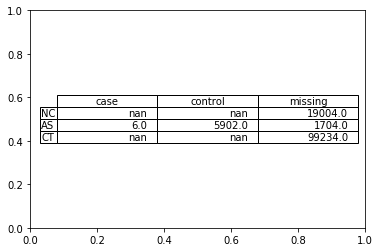

--------------------------------
binary traits -- chest_x_ray_14
    case  control  missing
NC   NaN      NaN  19004.0
AS   2.0   5904.0   1706.0
CT   NaN      NaN  99234.0


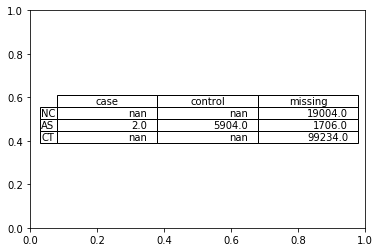

--------------------------------
binary traits -- chest_x_ray_15
    missing
NC    19004
AS     7612
CT    99234


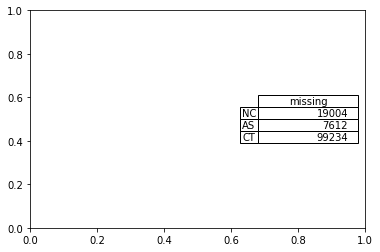

--------------------------------
binary traits -- chest_x_ray_16
    missing
NC    19004
AS     7612
CT    99234


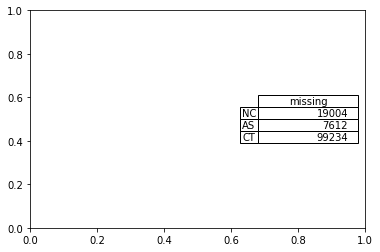

--------------------------------
binary traits -- chest_x_ray_17
    case  control  missing
NC   NaN      NaN  19004.0
AS   1.0   5906.0   1705.0
CT   NaN      NaN  99234.0


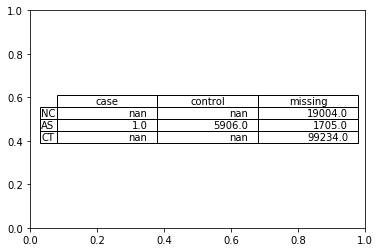

--------------------------------
binary traits -- chest_x_ray_18
    case  control  missing
NC   NaN      NaN  19004.0
AS   1.0   5905.0   1706.0
CT   NaN      NaN  99234.0


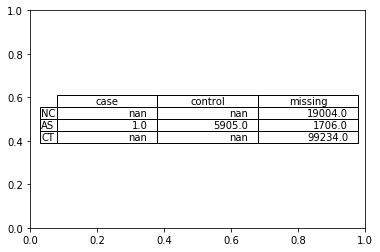

--------------------------------
binary traits -- chest_x_ray_19
    case  control  missing
NC   NaN      NaN  19004.0
AS  66.0   5854.0   1692.0
CT   NaN      NaN  99234.0


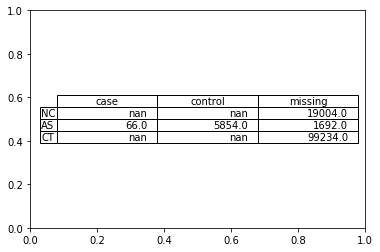

--------------------------------
binary traits -- chest_x_ray_20
    case  control  missing
NC   NaN      NaN  19004.0
AS   9.0   5901.0   1702.0
CT   NaN      NaN  99234.0


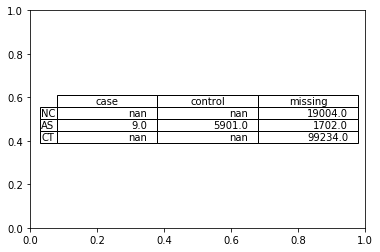

--------------------------------
binary traits -- chest_x_ray_21
     case  control  missing
NC    NaN      NaN  19004.0
AS  101.0   5827.0   1684.0
CT    NaN      NaN  99234.0


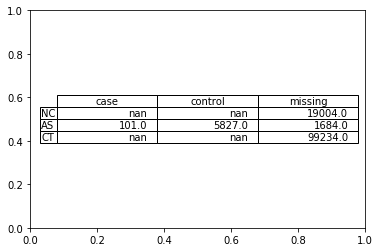

--------------------------------
binary traits -- chest_x_ray_22
    case  control  missing
NC   NaN      NaN  19004.0
AS   3.0   5904.0   1705.0
CT   NaN      NaN  99234.0


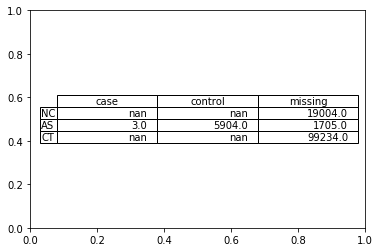

--------------------------------
binary traits -- chest_x_ray_23
    case  control  missing
NC   NaN      NaN  19004.0
AS  27.0   5882.0   1703.0
CT   NaN      NaN  99234.0


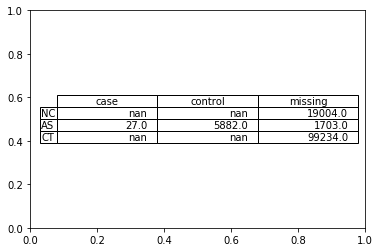

--------------------------------
binary traits -- chest_x_ray_24
    case  control  missing
NC   NaN      NaN  19004.0
AS   2.0   5904.0   1706.0
CT   NaN      NaN  99234.0


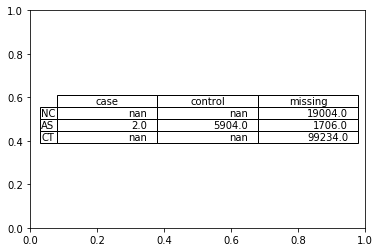

--------------------------------
binary traits -- chest_x_ray_25
    case  control  missing
NC   NaN      NaN  19004.0
AS  19.0   5891.0   1702.0
CT   NaN      NaN  99234.0


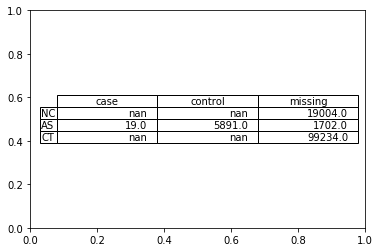

--------------------------------
binary traits -- chest_x_ray_26
    missing
NC    19004
AS     7612
CT    99234


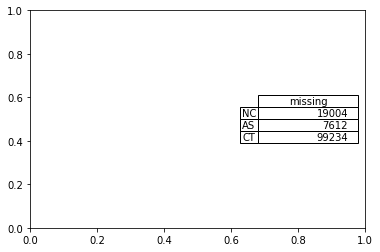

--------------------------------
binary traits -- chest_x_ray_27
    missing
NC    19004
AS     7612
CT    99234


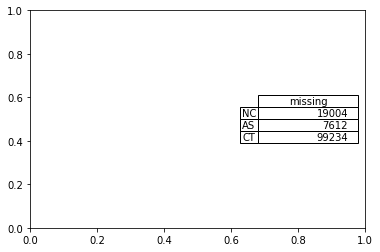

--------------------------------
binary traits -- chest_x_ray_28
    case  control  missing
NC   NaN      NaN  19004.0
AS   6.0   5900.0   1706.0
CT   NaN      NaN  99234.0


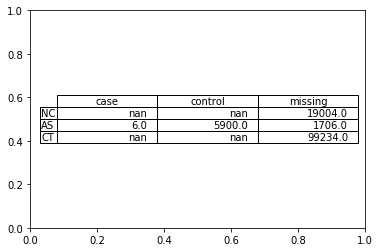

--------------------------------
binary traits -- chest_x_ray_29
    missing
NC    19004
AS     7612
CT    99234


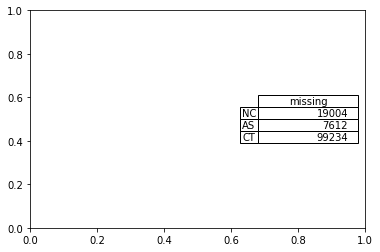

--------------------------------
binary traits -- chest_x_ray_30
    case  control  missing
NC   NaN      NaN  19004.0
AS   1.0   5905.0   1706.0
CT   NaN      NaN  99234.0


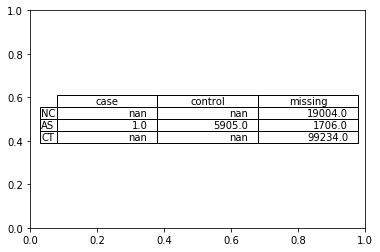

--------------------------------
binary traits -- chest_x_ray_31
    missing
NC    19004
AS     7612
CT    99234


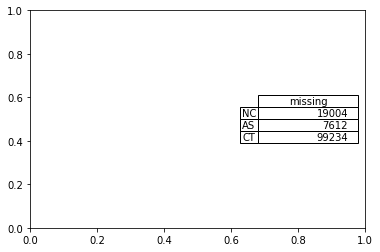

--------------------------------
binary traits -- chest_x_ray_32
    case  control  missing
NC   NaN      NaN  19004.0
AS   6.0   5902.0   1704.0
CT   NaN      NaN  99234.0


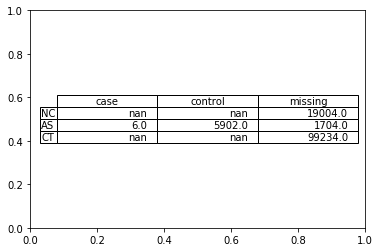

--------------------------------
binary traits -- chest_x_ray_33
    case  control  missing
NC   NaN      NaN  19004.0
AS  11.0   5898.0   1703.0
CT   NaN      NaN  99234.0


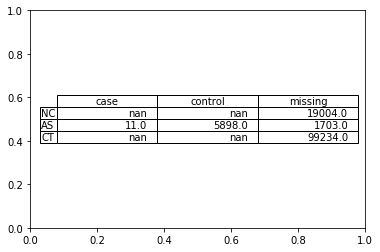

--------------------------------
binary traits -- chest_x_ray_34
    case  control  missing
NC   NaN      NaN  19004.0
AS  45.0   5876.0   1691.0
CT   NaN      NaN  99234.0


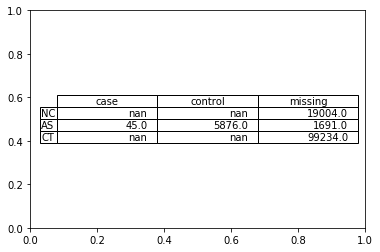

--------------------------------
quantitative traits -- grip_strength


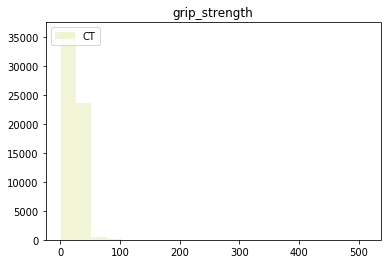

--------------------------------
quantitative traits -- ALP


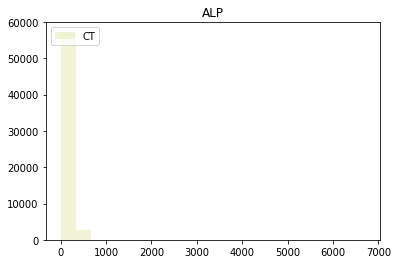

--------------------------------
quantitative traits -- FVC_predicted


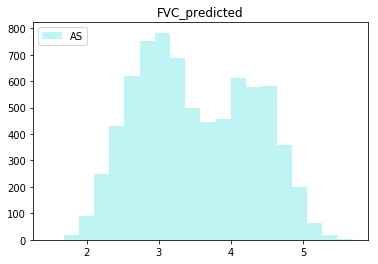

--------------------------------
quantitative traits -- FEV_predicted


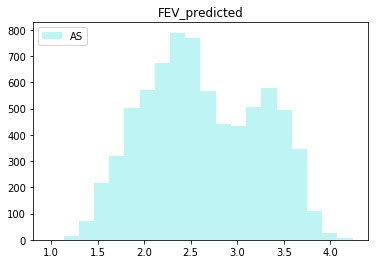

--------------------------------
quantitative traits -- FEV_over_FVC_predicted


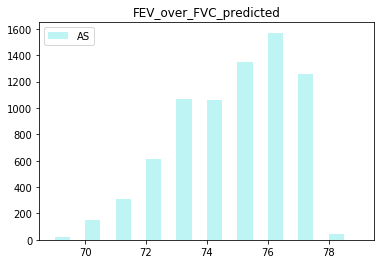

--------------------------------
quantitative traits -- MVV_predicted


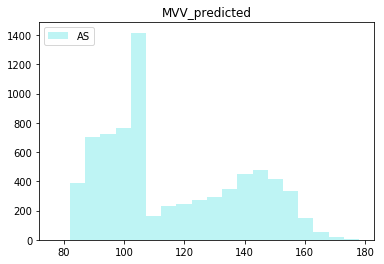

--------------------------------
quantitative traits -- bone_density_distal_sos


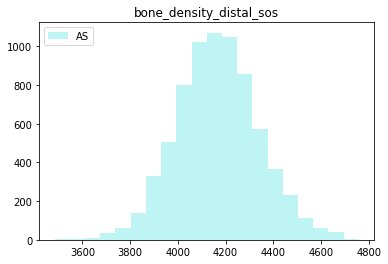

--------------------------------
quantitative traits -- bone_density_midshaft_sos


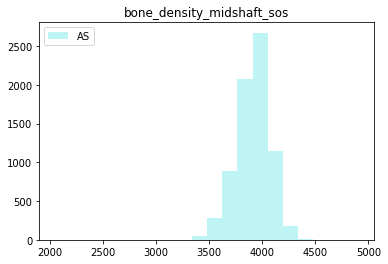

--------------------------------
quantitative traits -- protein_in_blood


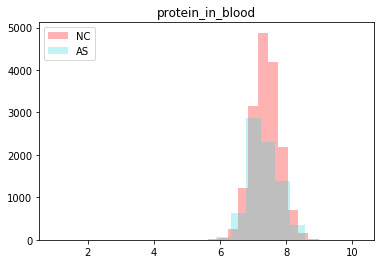

--------------------------------
quantitative traits -- glucose_in_blood


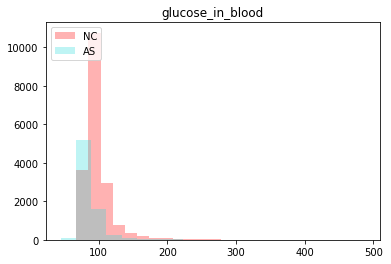

--------------------------------
quantitative traits -- cohort


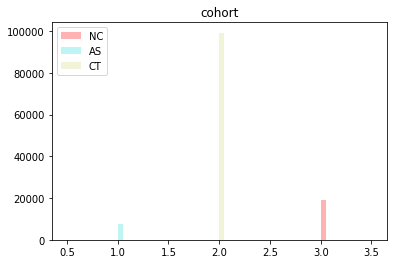

--------------------------------
quantitative traits -- bmi


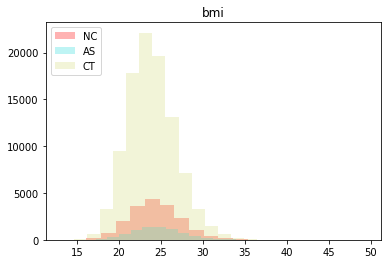

--------------------------------


In [54]:
for new_name,value in conversion_df.iteritems():
    value=value.copy()
    value_unique=value.unique()
    
    if (len(value_unique)==1) or len(value_unique)==2 and pd.isnull(value_unique).any() and (value_unique==2).any():
        print("binary traits","--",new_name)
        #value setting
        value[value!=2]=-9
        for cohort in conversion_df['cohort'].unique():
            cohort_bool=(conversion_df['cohort']==cohort)
            if (cohort_bool & (value==2)).any(): # if a questionnaire about this phenotype has been ever asked.
                value[cohort_bool & (value==-9) & control_filter]=1
        #summary
        phenotype_stat=pd.DataFrame([value[conversion_df['cohort']==cohort].value_counts().rename(cohort_to_name(cohort)) for cohort in conversion_df['cohort'].unique()])
        phenotype_stat=phenotype_stat.rename(columns={2: 'case', 1: 'control',-9:'missing'})
        phenotype_stat=phenotype_stat[phenotype_stat.columns.sort_values()]
        print(phenotype_stat)
        
        fig=plt.figure()
        plt.table(cellText=phenotype_stat.values,
                  colWidths = [0.3]*3,
                  rowLabels=phenotype_stat.index,
                  colLabels=phenotype_stat.columns,
                  loc='center right')
        plt.show()
        
        #print("case: {}".format((value==2).sum()))
        #print("control: {}".format((value==1).sum()))
        #print("missing: {}".format((value==-9).sum()))
    
    
    
    else:
        print("quantitative traits","--",new_name)
        #print(value_unique)
        value=value.fillna(-9)
        
        fig=plt.figure()
        plt.title(new_name)
        for cohort in conversion_df['cohort'].unique():
            cohort_bool=(conversion_df['cohort']==cohort)
            if (value[cohort_bool]!=-9).sum()==0:
                continue
            plt.hist(value[cohort_bool & (value!=-9)],bins=20,color=plt.cm.rainbow(cohort/3),label=cohort_to_name(cohort),alpha=0.3)
        plt.legend(loc='upper left')
        plt.show()
        
    value=value.map(try_float_to_int)
    phenotype_tosave=value.reset_index()
    phenotype_tosave=phenotype_tosave[[phenotype_tosave.columns[0],phenotype_tosave.columns[0],phenotype_tosave.columns[1]]]
    phenotype_tosave.to_csv(pheno_file_path.format(new_name),sep=' ',index=None,header=None)
    fig.savefig(pheno_sumstatsjpg_file_path.format(new_name))
        
    print('--------------------------------')

# Run genotype-phenotype association

In [ ]:
for new_name,converson in conversion_dict.items():
    print(conversion_dict[new_name].reset_index().isnull().sum())
    phenotype_tosave=conversion_dict[new_name].reset_index().fillna(-9)
    phenotype_tosave=phenotype_tosave[[phenotype_tosave.columns[0],phenotype_tosave.columns[0],phenotype_tosave.columns[1]]]
    phenotype_tosave.to_csv(pheno_file_path.format(new_name),sep=' ',index=None,header=None)

In [56]:
new_name='ACC'
run_subprocess('plink --bfile {} --assoc --pheno {} --linear --out {}'.format(imputed_bfile_path,pheno_file_path.format(new_name),assoc_file_path.format(new_name)))

------RUN-----
plink --bfile data/genotype/HLA_IMPUTED_Result.KCHIP_HLA.MHC --assoc --pheno data/out_pheno/ACC.pheno --linear --out data/out_assoc/ACC
------ERROR-----
Error: --linear without --all-pheno requires a scalar phenotype.

------OUTPUT-----
PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/out_assoc/ACC.log.
Options in effect:
  --assoc
  --bfile data/genotype/HLA_IMPUTED_Result.KCHIP_HLA.MHC
  --linear
  --out data/out_assoc/ACC
  --pheno data/out_pheno/ACC.pheno

305729 MB RAM detected; reserving 152864 MB for main workspace.
6354 variants loaded from .bim file.
125872 people (45726 males, 80146 females) loaded from .fam.
7531 phenotype values present after --pheno.



(b'PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/\n(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3\nLogging to data/out_assoc/ACC.log.\nOptions in effect:\n  --assoc\n  --bfile data/genotype/HLA_IMPUTED_Result.KCHIP_HLA.MHC\n  --linear\n  --out data/out_assoc/ACC\n  --pheno data/out_pheno/ACC.pheno\n\n305729 MB RAM detected; reserving 152864 MB for main workspace.\n6354 variants loaded from .bim file.\n125872 people (45726 males, 80146 females) loaded from .fam.\n7531 phenotype values present after --pheno.\n',
 b'Error: --linear without --all-pheno requires a scalar phenotype.\n')

In [ ]:
for new_name,converson in conversion_dict.items():
    run_subprocess('plink --bfile {} --assoc --pheno {} --linear --out {}'.format(imputed_bfile_path,pheno_file_path.format(new_name),assoc_file_path.format(new_name)))

In [ ]:
for new_name,converson in conversion_dict.items():
    run_subprocess('plink --bfile {} --assoc --pheno {} --out {}'.format(imputed_bfile_path,pheno_file_path.format(new_name),assoc_file_path.format(new_name)))

# Histogram